<a href="https://colab.research.google.com/github/AleFax99/DeepLearning_GroupProject/blob/main/DL_Assignment_baseline_2__IN_USE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Dataset

You can download the dataset from {https://darwin.v7labs.com/v7-labs/covid-19-chest-x-ray-dataset?sort=priority\%3Adesc}.
The data entitled as '`darwin dataset pull v7-labs/covid-19-chest-x-ray-dataset:all-images`' will be used in this assignment. All dataset consist of 6504 images from 702 classes. We will extract the images of 4 classes (Bacterial Pneumonia, Viral Pneumonia, No Pneumonia (healthy), Covid-19) and save them as .npy file with the following code:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %cd /content/drive/MyDrive/Deep Learning - Group Project 
#### Andreea Gdrive path

/content/drive/.shortcut-targets-by-id/1qsBT4V5PUBeJK1UavH8V46pQAoKjtkPa/Deep Learning - Group Project


In [43]:
%cd /content/drive/MyDrive/Deep Learning/Deep Learning - Group Project
!pwd

/content/drive/MyDrive/Deep Learning/Deep Learning - Group Project
/content/drive/MyDrive/Deep Learning/Deep Learning - Group Project


In [44]:
import numpy as np
import pandas as pd

y_train = np.load('./y_train.npy')
y_test = np.load('./y_test.npy')
y_val = np.load('./y_val.npy')
X_train = np.load('./X_train.npy')
X_test = np.load('./X_test.npy')
X_val = np.load('./X_val.npy')

In [ ]:
# import json
# import numpy as np
# import glob
# import pandas as pd

# # importing modules
# import urllib.request
# from PIL import Image
# from keras import layers, models


In [ ]:
# import json
# import numpy as np
# import glob
# import pandas as pd

# # importing modules
# import urllib.request
# from PIL import Image
# from keras import layers, models
# import tensorflow as tf

# # all-images file should be uploaded to the same file
# imageNames = glob.glob("./all-images/*")
# print(type(imageNames))
# print(len(imageNames))
# print(imageNames)

In [ ]:

# import json
# import numpy as np
# import glob
# import pandas as pd

# # importing modules
# import urllib.request
# from PIL import Image
# from keras import layers, models
# import tensorflow as tf

# # all-images file should be uploaded to the same file
# imageNames = glob.glob("./all-images/*")

# dataset = []
# labels = []

# for i, imName in enumerate(imageNames):

#     # Opening JSON file
#     f = open(imName)
#     data = json.load(f)
#     for j in range(len(data['annotations'])):

#         if 'COVID-19' in (data['annotations'][j]['name']):
#           #load images from url    
#             urllib.request.urlretrieve(data['image']['url'],"img.png")    
#             img = Image.open("img.png")
#             #convert images to grayscale
#             imgGray = img.convert('L')
#             #resize the image (156x156)
#             im = imgGray.resize((156,156), Image.LANCZOS)           
#             label = data['annotations'][j]['name']
#             dataset.append(np.array(im))
#             labels.append(label)
#             print(label)
#             break

#         if 'Viral Pneumonia' in (data['annotations'][j]['name']) \
#             or 'Bacterial Pneumonia' in (data['annotations'][j]['name']) \
#             or 'No Pneumonia (healthy)' in (data['annotations'][j]['name']):
#             #load images from url    
#             urllib.request.urlretrieve(data['image']['url'],"img.png")    
#             img = Image.open("img.png")
#             #convert images to grayscale
#             imgGray = img.convert('L')
#             #resize the image (156x156)
#             im = imgGray.resize((156,156), Image.LANCZOS)           
#             label = data['annotations'][j]['name']
#             dataset.append(np.array(im))
#             labels.append(label)
#             break

# #Convert data shape of (n_of_samples, width, height, 1)
# dataset = np.dstack(dataset)    
# dataset = np.rollaxis(dataset,-1)
# labels = np.array(labels)

# #convert images gray scale to rgb
# data = np.array(layers.Lambda(tf.image.grayscale_to_rgb)(tf.expand_dims(dataset, -1)))

# # save data and labels into a folder
# np.save("./data.npy", data)
# np.save("./labels.npy", labels)

Once you save your data, you can load it from your directory.

In [ ]:
import numpy as np

data = np.load('./data.npy')
labels = np.load('./labels.npy')

# Preprocessing Steps



## Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(data, labels, test_size= 0.2, stratify= labels, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size= 0.25, stratify= y_train_val , random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)


(3840, 156, 156, 3) (1280, 156, 156, 3) (1281, 156, 156, 3)


## Normalize Data

In [ ]:
# normalize to range 0-1
# Note: minimum = 0, maximum = 255.0
# Formula: (value - minimum) / (maximum - minimum)
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(3840, 156, 156, 3)
(1280, 156, 156, 3)
(1281, 156, 156, 3)


In [ ]:
np.unique(y_train, return_counts=True) # we are dealing with an imbalanced dataset (miro-avg)


(array(['Bacterial Pneumonia', 'COVID-19', 'No Pneumonia (healthy)',
        'Viral Pneumonia'], dtype='<U22'), array([1695,   76,  964, 1105]))

In [ ]:
np.unique(labels, return_counts=True)

(array(['Bacterial Pneumonia', 'COVID-19', 'No Pneumonia (healthy)',
        'Viral Pneumonia'], dtype='<U22'), array([2825,  127, 1606, 1843]))

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)


In [ ]:
le.classes_

array(['Bacterial Pneumonia', 'COVID-19', 'No Pneumonia (healthy)',
       'Viral Pneumonia'], dtype='<U22')

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
np.save("./y_train.npy", y_train)
np.save("./y_test.npy", y_test)
np.save("./y_val.npy", y_val)
np.save("./X_train.npy", X_train)
np.save("./X_test.npy", X_test)
np.save("./X_val.npy", X_val)

# Create Baseline Model

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model(optimizer='adam'): # which inputs should we have?
  model = models.Sequential()
  model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape = (156,156,3), padding="same"))
  model.add(layers.Conv2D(32, (3,3), activation='relu', padding="same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
  model.add(layers.Conv2D(64, (3,3), activation='relu', padding="same"))
  model.add(layers.Conv2D(32, (3,3), activation='relu', padding="same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
  model.add(layers.Flatten())
  model.add(layers.Dense(32, activation="relu"))
  model.add(layers.Dense(32, activation="relu"))
  model.add(layers.Dense(4, activation="softmax"))

  model.compile(optimizer= optimizer, 
                         loss="categorical_crossentropy",
                         metrics=['accuracy']
                         )
  return model


In [ ]:
# model.build()
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 156, 156, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 156, 156, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 78, 78, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 78, 78, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 78, 78, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                    

In [ ]:
# model.compile(
#     optimizer='adam',
#     loss=tf.keras.losses.CategoricalCrossentropy(),
#     metrics=['accuracy']
# )
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)
original_hist = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, y_val), 
    verbose=0
)
history_dict = original_hist.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
model.save("./Results and Models/baseline_model")

# https://www.tensorflow.org/guide/keras/save_and_serialize

In [9]:
from keras.models import load_model
baseline_model = load_model("./talos_models/baseline_model")

In [20]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, auc
y_pred1 = baseline_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)
y_test1= np.argmax(y_test,axis=1)



41/41 [==============================] - 1s 16ms/step


In [21]:
# Print f1, precision, and recall scores
precision_score(y_test1, y_pred , average="macro")


0.6743088615735395

In [22]:
recall_score(y_test1, y_pred , average="macro")


0.6039966550648755

In [23]:
f1_score(y_test1, y_pred , average="macro")

0.6202080244184753

In [ ]:
np.save("./Results and Models/baseline_hist.npy", history_dict) #saving
history_baseline=np.load('./Results and Models/baseline_hist.npy',allow_pickle='TRUE').item() #loading

In [ ]:
history_baseline.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Analyze the performance of the baseline model

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test) # 0.7377

41/41 [==============================] - 1s 22ms/step - loss: 1.2613 - accuracy: 0.7237


# Plots

## Training and validation losses and accuracies on the training and validation set

In [ ]:
#plot
import matplotlib.pyplot as plt

def plot_history(data_list, label_list, title, ylabel):
    ''' Plots a list of vectors.
    Parameters:
        data_list  : list of vectors containing the values to plot
        label_list : list of labels describing the data, one per vector
        title      : title of the plot
        ylabel     : label for the y axis
    '''
    epochs = range(1, len(data_list[0]) + 1)
    for data, label in zip(data_list, label_list):
        plt.plot(epochs, data, label=label)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

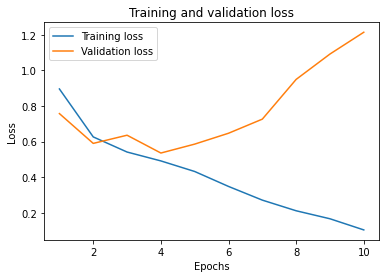

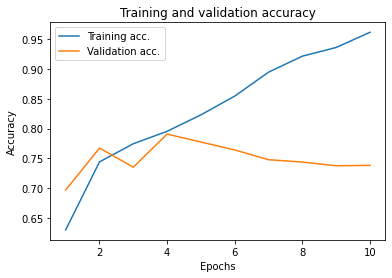

In [ ]:
%matplotlib inline

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')

## Receiver Operator Characteristic (ROC) curve with the Area under the Curve (AUC) score

Preprocessing:

In [34]:
classes = np.array(['Bacterial Pneumonia', 'COVID-19', 'No Pneumonia (healthy)','Viral Pneumonia'])
class_of_interest = "COVID-19"
class_id = np.flatnonzero(classes == class_of_interest)[0]
print(class_id)

1


In [35]:
y_pred = baseline_model.predict(X_test)

41/41 [==============================] - 1s 16ms/step


In [36]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.92


In [38]:
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(len(classes)):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= len(classes)

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.90


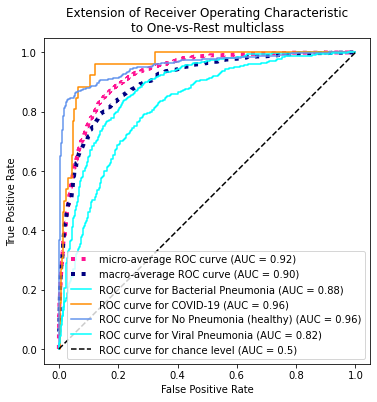

In [40]:
from itertools import cycle
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(len(classes)), colors):
    RocCurveDisplay.from_predictions(
        y_test[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {classes[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

## Confusion matrix for the validation and test set

In [ ]:
y_val_pred = model.predict(X_val)

NameError: ignored

In [ ]:
y_val_train = model.predict(X_train)

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

labels = le.classes_ 
cm = confusion_matrix(y_train.argmax(axis=1), y_val_train.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Reds)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

labels = le.classes_ 
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Reds)
plt.show()

# cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
# print(cm)
# acc = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
# print('test_accuracy: %.3f' % (acc))

# Adapting/fine-tuning the network

In [ ]:
%cd /content/drive/MyDrive/Deep Learning - Group Project 

/content/drive/.shortcut-targets-by-id/1qsBT4V5PUBeJK1UavH8V46pQAoKjtkPa/Deep Learning - Group Project


In [ ]:
import numpy as np
import pandas as pd

y_train = np.load('./y_train.npy')
y_test = np.load('./y_test.npy')
y_val = np.load('./y_val.npy')
X_train = np.load('./X_train.npy')
X_test = np.load('./X_test.npy')
X_val = np.load('./X_val.npy')

In [ ]:
#plot


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam


def build_tuned_model(optimizer='adam', units1 = 64, units2 = 32): # which inputs should we have?
  model = models.Sequential()
  model.add(layers.Conv2D(units1, (3,3), activation='relu', input_shape = (156,156,3), padding="same"))
  model.add(layers.Conv2D(units2, (3,3), activation='relu', padding="same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))

  # model.add(layers.Conv2D(units1,  kernel_size=(3,3), activation='relu', padding="same"))
  # model.add(layers.Conv2D(units2,  kernel_size = (3,3), activation='relu', padding="same"))
  # model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))

  # model.add(layers.Conv2D(units1,  kernel_size=(3,3), activation='relu', padding="same"))
  # model.add(layers.Conv2D(units2,  kernel_size = (3,3), activation='relu', padding="same"))
  # model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))

  model.add(layers.Conv2D(units1, (3,3), activation='relu', padding="same"))
  model.add(layers.Conv2D(units2, (3,3), activation='relu', padding="same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))

  model.add(layers.Flatten())

  model.add(layers.Dense(units2, activation="relu"))
  model.add(layers.Dense(units2, activation="relu"))

  model.add(layers.Dense(4, activation="softmax"))

  model.compile(optimizer= optimizer, 
                         loss="categorical_crossentropy",
                         metrics=['accuracy']
                         )
  return model


In [ ]:
from tensorflow.keras.optimizers import Adam
# tuned_model = build_tuned_model(optimizer = Adam(learning_rate=0.0001)  )
tuned_model = build_tuned_model(optimizer = Adam(learning_rate=0.00001),units1 = 16, units2 = 160 )

In [ ]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)
tuned_hist = tuned_model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, y_val), 
    verbose=1
)
history_dict_tuned = tuned_hist.history
history_dict_tuned.keys()



Epoch 1/10
120/120 [==============================] - 19s 122ms/step - loss: 1.1661 - accuracy: 0.4609 - val_loss: 1.0407 - val_accuracy: 0.5719
Epoch 2/10
120/120 [==============================] - 14s 115ms/step - loss: 0.9402 - accuracy: 0.6164 - val_loss: 0.8417 - val_accuracy: 0.6531
Epoch 3/10
120/120 [==============================] - 14s 116ms/step - loss: 0.7759 - accuracy: 0.6685 - val_loss: 0.7055 - val_accuracy: 0.7383
Epoch 4/10
120/120 [==============================] - 14s 114ms/step - loss: 0.6701 - accuracy: 0.7292 - val_loss: 0.6262 - val_accuracy: 0.7492
Epoch 5/10
120/120 [==============================] - 14s 116ms/step - loss: 0.6033 - accuracy: 0.7604 - val_loss: 0.6137 - val_accuracy: 0.7375
Epoch 6/10
120/120 [==============================] - 14s 114ms/step - loss: 0.5693 - accuracy: 0.7703 - val_loss: 0.5928 - val_accuracy: 0.7406
Epoch 7/10
120/120 [==============================] - 14s 114ms/step - loss: 0.5552 - accuracy: 0.7768 - val_loss: 0.5635 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
tuned_model.save("./Results and Models/t_model_best")
np.save("./Results and Models/t_model_best.npy", history_dict_tuned) #saving hist

In [ ]:
test_loss, test_acc = tuned_model.evaluate(X_test, y_test) # 0.7377
val_loss, val_acc = tuned_model.evaluate(X_val, y_val)
print( test_loss , test_acc)
print( val_loss , val_acc) 

40/40 [==============================] - 1s 26ms/step - loss: 0.5400 - accuracy: 0.7781
0.5586454272270203 0.7642467021942139
0.5400112867355347 0.778124988079071


In [ ]:
from keras.models import load_model
# t_baseline_model = load_model("./Results and Models/t_baseline_model") #load the model
history_t_baseline_model=np.load('./Results and Models/t_baseline_model.npy',allow_pickle='TRUE').item() #load teh hist dict

# t_model_lr_lower = load_model("./Results and Models/t_model_lr_lower") #load the model
history_t_model_lr_lower=np.load('./Results and Models/t_model_lr_lower.npy',allow_pickle='TRUE').item() #load teh hist dict

# t_model_lr_lower_2 = load_model("./Results and Models/t_model_lr_lower_2") #load the model
history_t_model_lr_lower_2=np.load('./Results and Models/t_model_lr_lower_2.npy',allow_pickle='TRUE').item() #load teh hist dict

# t_model_lr_lower3 = load_model("./Results and Models/t_model_lr_lower3") #load the model
history_t_model_lr_lower3=np.load('./Results and Models/t_model_lr_lower3.npy',allow_pickle='TRUE').item() #load teh hist dict

# t_model_64units = load_model("./Results and Models/t_model_64units") #load the model
history_t_model_64units=np.load('./Results and Models/t_model_64units.npy',allow_pickle='TRUE').item() #loading

# t_model_more_layers = load_model("./Results and Models/t_model_more_layers") #load the model
history_t_model_more_layers=np.load('./Results and Models/t_model_more_layers.npy',allow_pickle='TRUE').item() #loading

# t_model_2more_layers = load_model("./Results and Models/t_model_2more_layers") #load the model
history_t_model_2more_layers=np.load('./Results and Models/t_model_2more_layers.npy',allow_pickle='TRUE').item() #loading

In [ ]:
tuned_model_1.optimizer.get_config()

In [ ]:
tuned_model_2.optimizer.get_config()

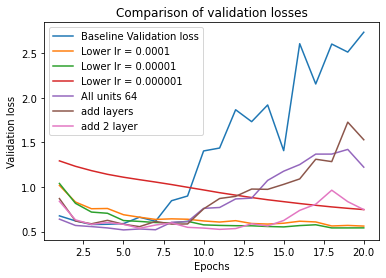

In [ ]:
baseline_val_loss = history_t_baseline_model['val_loss']
tuned_model_val_loss = history_t_model_lr_lower['val_loss']
tuned_1_model_val_loss = history_t_model_lr_lower_2['val_loss']
tuned_2_model_val_loss = history_t_model_lr_lower3['val_loss']
tuned_3_model_val_loss = history_t_model_64units['val_loss']
tuned_4_model_val_loss = history_t_model_more_layers['val_loss']
tuned_5_model_val_loss = history_t_model_2more_layers['val_loss']

plot_history(data_list=[baseline_val_loss, tuned_model_val_loss,tuned_1_model_val_loss,tuned_2_model_val_loss, tuned_3_model_val_loss,tuned_4_model_val_loss,tuned_5_model_val_loss ],
             label_list=['Baseline Validation loss', 'Lower lr = 0.0001', 'Lower lr = 0.00001', 'Lower lr = 0.000001', 'All units 64',"add layers", "add 2 layer"],
             title='Comparison of validation losses',
             ylabel='Validation loss')

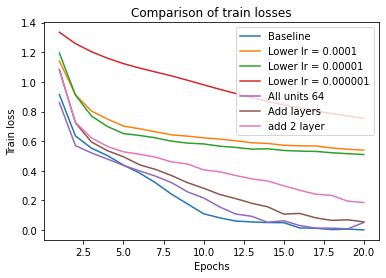

In [ ]:
baseline_train_loss = history_t_baseline_model['loss']
tuned_model_train_loss = history_t_model_lr_lower['loss']
tuned_1_model_train_loss = history_t_model_lr_lower_2['loss']
tuned_2_model_train_loss = history_t_model_lr_lower3['loss']
tuned_3_model_train_loss = history_t_model_64units['loss']
tuned_4_model_train_loss = history_t_model_more_layers['loss']
tuned_5_model_train_loss = history_t_model_2more_layers['loss']

plot_history(data_list=[baseline_train_loss, tuned_model_train_loss,tuned_1_model_train_loss,tuned_2_model_train_loss,tuned_3_model_train_loss,tuned_4_model_train_loss,tuned_5_model_train_loss],
             label_list=['Baseline', 'Lower lr = 0.0001', 'Lower lr = 0.00001', 'Lower lr = 0.000001', 'All units 64', "Add layers", "add 2 layer"],
             title='Comparison of train losses',
             ylabel='Train loss')

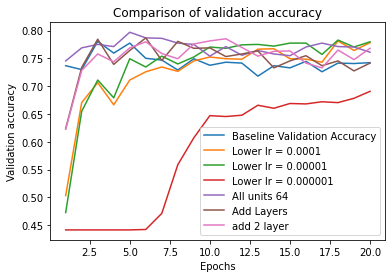

In [ ]:
baseline_val_accuracy = history_t_baseline_model['val_accuracy']
tuned_model_val_accuracy = history_t_model_lr_lower['val_accuracy']
tuned_1_model_val_accuracy = history_t_model_lr_lower_2['val_accuracy']
tuned_2_model_val_accuracy = history_t_model_lr_lower3['val_accuracy']
tuned_3_model_val_accuracy = history_t_model_64units['val_accuracy']
tuned_4_model_val_accuracy = history_t_model_more_layers['val_accuracy']
tuned_5_model_val_accuracy = history_t_model_2more_layers['val_accuracy']

plot_history(data_list=[baseline_val_accuracy, tuned_model_val_accuracy,tuned_1_model_val_accuracy,tuned_2_model_val_accuracy,tuned_3_model_val_accuracy,tuned_4_model_val_accuracy,tuned_5_model_val_accuracy ],
             label_list=['Baseline Validation Accuracy', 'Lower lr = 0.0001', 'Lower lr = 0.00001', 'Lower lr = 0.000001', 'All units 64', "Add Layers", "add 2 layer"],
             title='Comparison of validation accuracy',
             ylabel='Validation accuracy')

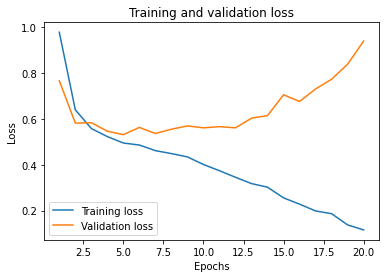

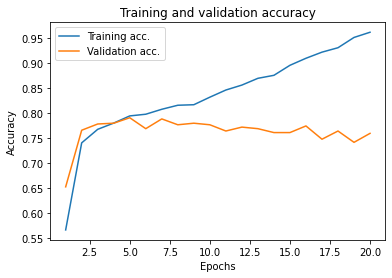

In [ ]:
%matplotlib inline

acc = history_dict_tuned['accuracy']
val_acc = history_dict_tuned['val_accuracy']
loss = history_dict_tuned['loss']
val_loss = history_dict_tuned['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')

In [ ]:
pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 9.4 MB/s eta 0:00:00


In [ ]:
import keras_tuner
from tensorflow import keras

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

from tensorflow.keras.optimizers import Adam
## activation,
def tobe_tuned_model( units_1 , units_2, lr , addlayers1, addlayers2): # which inputs should we have?
  model = models.Sequential()
  model.add(layers.Conv2D(units_1, kernel_size= (3,3), activation='relu', input_shape = (156,156,3), padding="same"))
  model.add(layers.Conv2D(units_2, kernel_size= (3,3), activation='relu', padding="same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))

  model.add(layers.Conv2D(units_1,  kernel_size=(3,3), activation='relu', padding="same"))
  model.add(layers.Conv2D(units_2,  kernel_size = (3,3), activation='relu', padding="same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
  if addlayers1:
    model.add(layers.Conv2D(units_1,  kernel_size=(3,3), activation='relu', padding="same"))
    model.add(layers.Conv2D(units_2,  kernel_size = (3,3), activation='relu', padding="same"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
  if addlayers2:
    model.add(layers.Conv2D(units_1,  kernel_size=(3,3), activation='relu', padding="same"))
    model.add(layers.Conv2D(units_2,  kernel_size = (3,3), activation='relu', padding="same"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))

  model.add(layers.Flatten())

  model.add(layers.Dense(units_2, activation="relu"))
  model.add(layers.Dense(units_2, activation="relu"))
  
  model.add(layers.Dense(4, activation="softmax"))

  model.compile(optimizer=Adam(learning_rate = lr), 
                         loss="categorical_crossentropy",
                         metrics=['accuracy']
                         )
  return model



def build_tuned_model(hp):
  units_1 = hp.Int('units_1', min_value = 16 , max_value = 64, step = 16)
  units_2 = hp.Int('units_2', min_value = 16 , max_value = 64, step = 16)
  addlayers1 = hp.Boolean("addlayers1")
  addlayers2 = hp.Boolean("addlayers2")

  # dropout_rate = hp.Float("dropout_rate", min_value=0.2, max_value=1, step=0.2,parent_name=dropout , parent_values=True )
  # activation = hp.Choice("activation", ["relu", "tanh"])
  lr = hp.Float("lr", min_value=1e-4, max_value=0.001, step=10,sampling="log", default=1e-3)
  # call existing model-building code with the hyperparameter values.
  model = tobe_tuned_model(
       lr=lr , units_1 = units_1 , units_2 = units_2 ,addlayers1 = addlayers1 , addlayers2 = addlayers2 
  )
  return model

##dropout=dropout, lr=lr , dropout_rate = dropout_rate

In [ ]:
1e-2

0.01

In [ ]:

build_tuned_model(keras_tuner.HyperParameters())

In [ ]:
# from tensorflow.keras.utils import set_random_seed
# set_random_seed(42)

tuner = keras_tuner.RandomSearch(
    hypermodel=build_tuned_model,
    objective="val_accuracy",
    max_trials=20,
    executions_per_trial=1,
    overwrite=True,
    directory="./Results and Models",
    project_name="KerasTunning",
    seed = 42
)

In [ ]:
tuner.search(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val))

Trial 20 Complete [00h 00m 48s]
val_accuracy: 0.7875000238418579

Best val_accuracy So Far: 0.801562488079071
Total elapsed time: 00h 29m 53s


In [ ]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 156, 156, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 156, 156, 64)      9280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 78, 78, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 78, 78, 16)        9232      
                                                                 
 conv2d_3 (Conv2D)           (None, 78, 78, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 39, 39, 64)       0         
 2D)                                                    

In [ ]:
tuner.results_summary()

Results summary
Results in ./Results and Models/KerasTunning
Showing 10 best trials
Trial summary
Hyperparameters:
units_1: 16
units_2: 64
addlayers1: True
addlayers2: True
lr: 9.999999999999999e-05
Score: 0.801562488079071
Trial summary
Hyperparameters:
units_1: 16
units_2: 32
addlayers1: True
addlayers2: False
lr: 0.001
Score: 0.7953125238418579
Trial summary
Hyperparameters:
units_1: 32
units_2: 32
addlayers1: False
addlayers2: True
lr: 9.999999999999999e-05
Score: 0.79296875
Trial summary
Hyperparameters:
units_1: 16
units_2: 16
addlayers1: False
addlayers2: True
lr: 0.001
Score: 0.7906249761581421
Trial summary
Hyperparameters:
units_1: 16
units_2: 16
addlayers1: False
addlayers2: True
lr: 9.999999999999999e-05
Score: 0.7875000238418579
Trial summary
Hyperparameters:
units_1: 16
units_2: 32
addlayers1: False
addlayers2: False
lr: 9.999999999999999e-05
Score: 0.7867187261581421
Trial summary
Hyperparameters:
units_1: 64
units_2: 48
addlayers1: True
addlayers2: False
lr: 0.001
Score



# Talos Tuner


In [ ]:
!pip install talos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 KB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.1 MB/s eta 0:00:00
  Created wheel for chances: filename=chances-0.1.9-py3-none-any.whl size=41609 sha256=d1c0259d4254becd4956329330be888510aee3861bb5025b430075659e936f12
  Stored in directory: /root/.cache/pip/wheels/bc/47/dc/208d4038848287f804b6ededf43632ba7dbea530fdb3a069e4
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=69c9a9df5b60437b7fd158408fb7261f40c3181c07c90cfbfdc10a3fa2a81104
  Stor

In [ ]:
# set the parameter space boundary
p = { #'activation':['relu', 'elu'],
     'optimizer': ['Nadam', 'Adam'], # ,"AdamW" - had an error 
     'losses': ['categorical_crossentropy'],
    #  'lr': (0.1, 0,001, ),
    #  'shapes': ['brick'],
     'regularizer' : [ regularizers.l2(0.001), 'l1_l2' , None],
     'first_neuron': [16, 32, 64, 128],
     'second_neuron': [16, 32, 64, 128],
     'third_neuron': [16, 32, 64, 128],
     'fourth_neuron': [16, 32, 64, 128],
     'fifth_neuron': [16, 32, 64, 128],
     'sixth_neuron': [16, 32, 64, 128],
    #  'hidden_layers':[0, 1, 2, 3],
    #  'dropout': [.2, .3, .4],
     'batch_size': [16, 32],
     'epochs': [10 ]}


def build_tuned_model(x_train, y_train, x_val, y_val, params): # which inputs should we have?
  model = Sequential()
  model.add(layers.Conv2D(params['first_neuron'], (3,3), activation='relu', input_shape = (156,156,3), padding="same",kernel_regularizer=params['regularizer']))
  model.add(layers.Conv2D(params['second_neuron'], (3,3), activation='relu', padding="same",kernel_regularizer=params['regularizer']))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
  model.add(layers.Conv2D(params['third_neuron'], (3,3), activation='relu', padding="same",kernel_regularizer=params['regularizer']))
  model.add(layers.Conv2D(params['fourth_neuron'], (3,3), activation='relu', padding="same",kernel_regularizer=params['regularizer']))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
  model.add(layers.Flatten())
  model.add(layers.Dense(params['fifth_neuron'], activation="relu",kernel_regularizer=params['regularizer']))
  model.add(layers.Dense(params['sixth_neuron'], activation="relu",kernel_regularizer=params['regularizer']))
  model.add(layers.Dense(4, activation="softmax"))

  model.compile(optimizer= params['optimizer'], #(lr=lr_normalizer(params['lr'], params['optimizer'])), 
                         loss=params['losses'],
                         metrics=['accuracy',talos.utils.metrics.f1score, talos.utils.metrics.precision, talos.utils.metrics.recall ]
                         )
  out = model.fit(x_train, y_train, callbacks=[talos.callbacks.ExperimentLog('talos_tuner_2', params)],
                  batch_size=params['batch_size'],
                  epochs=params['epochs'],
                  validation_data=[x_val, y_val],
                  verbose=0
                  # callbacks=[talos.utils.early_stopper(params['epochs'])]
                  )
  return out, model


In [ ]:
# start the experiment
scan_object = talos.Scan(x=X_train,
                         y=y_train,
                         x_val=X_val,
                         y_val=y_val,
                         model=build_tuned_model,
                         experiment_name='talos_tuner_2',
                         params=p,
                         round_limit=30,
                         seed = 42)

In [ ]:
scan_object.data.to_csv("evaluation_data_talos.csv")

In [ ]:
scan_object.evaluate_models(
                        x_val=X_val,
                        y_val=y_val,
                        n_models=30,
                        metric='val_accuracy',
                        shuffle=True,
                        asc=False,
                        task ='multi_label'
                         )

In [ ]:
# get the name of the experiment log
!ls -lhtr talos_tuner_2

total 4.0K
-rw------- 1 root root 4.0K Mar  3 11:22 030323111151.csv
-rw------- 1 root root    0 Mar  3 12:58 030323125804.csv


In [ ]:
from talos.utils.recover_best_model import recover_best_model

results, models = recover_best_model(x_train=X_train,
                                     y_train=y_train,
                                     x_val=X_val,
                                     y_val=y_val,
                                     experiment_log='talos_tuner_2/030323111151.csv',
                                     input_model=build_tuned_model,
                                     n_models=30,
                                     metric = "val_accuracy",
                                    #  average = 'macro',
                                     task = 'multi_label'
                                     )

8/8 [==============================] - 0s 10ms/step


In [41]:
results_tuning = pd.read_csv("talos_tuned_results.csv")

In [42]:
results_tuning

,Unnamed: 0,start,end,duration,round_epochs,loss,accuracy,f1score,precision,recall,...,losses,regularizer,first_neuron,second_neuron,third_neuron,fourth_neuron,fifth_neuron,sixth_neuron,batch_size,epochs
0,0,03/03/23-161934,03/03/23-162002,28.650561,10,4.925765,0.441406,0.000000,0.000000,0.000000,...,categorical_crossentropy,l1_l2,64,128,64,32,64,32,32,10
1,1,03/03/23-162003,03/03/23-162026,23.586361,10,0.454000,0.894531,0.894346,0.900712,0.888281,...,categorical_crossentropy,<keras.regularizers.L2 object at 0x7f43b5922130>,16,128,32,16,128,128,32,10
2,2,03/03/23-162026,03/03/23-162056,29.975721,10,0.470020,0.877344,0.876254,0.883591,0.869531,...,categorical_crossentropy,<keras.regularizers.L2 object at 0x7f43b5922130>,16,64,32,64,64,16,16,10
3,3,03/03/23-162057,03/03/23-162123,26.061237,10,0.051085,0.983854,0.983854,0.983854,0.983854,...,categorical_crossentropy,NaN,64,16,128,64,128,32,16,10
4,4,03/03/23-162123,03/03/23-162152,29.212086,10,0.166069,0.933333,0.933523,0.935876,0.931250,...,categorical_crossentropy,NaN,128,16,16,128,32,64,32,10
5,5,03/03/23-162152,03/03/23-162225,32.085407,10,1.818193,0.441406,0.000000,0.000000,0.000000,...,categorical_crossentropy,l1_l2,64,128,64,16,16,16,16,10
6,6,03/03/23-162225,03/03/23-162302,36.728439,10,2.626605,0.441406,0.000000,0.000000,0.000000,...,categorical_crossentropy,l1_l2,16,128,64,32,32,128,16,10
7,7,03/03/23-162302,03/03/23-162332,30.396732,10,1.894902,0.441406,0.000000,0.000000,0.000000,...,categorical_crossentropy,l1_l2,32,32,128,16,32,64,16,10
8,8,03/03/23-162333,03/03/23-162359,26.071666,10,0.176952,0.935677,0.934696,0.938009,0.931510,...,categorical_crossentropy,NaN,32,64,32,128,16,64,32,10
9,9,03/03/23-162359,03/03/23-162422,23.253738,10,0.378659,0.850521,0.846410,0.860491,0.833594,...,categorical_crossentropy,NaN,32,32,64,16,32,16,16,10


In [52]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

def build_tuned_model(optimizer, units1, units2 , units3,units4,units5,units6): # which inputs should we have?
  model = models.Sequential()
  model.add(layers.Conv2D(units1, (3,3), activation='relu', input_shape = (156,156,3), padding="same",kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.Conv2D(units2, (3,3), activation='relu', padding="same", kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
  
  model.add(layers.Conv2D(units3, (3,3), activation='relu', padding="same", kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.Conv2D(units4, (3,3), activation='relu', padding="same", kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))

  model.add(layers.Flatten())

  model.add(layers.Dense(units5, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.Dense(units6, activation="relu", kernel_regularizer=regularizers.l2(0.001)))

  model.add(layers.Dense(4, activation="softmax"))

  model.compile(optimizer= optimizer, 
                         loss="categorical_crossentropy",
                         metrics=['accuracy']
                         )
  return model

In [53]:
tuned_model = build_tuned_model(optimizer = "nadam",units1 = 64, units2 = 64 , units3 = 128, units4= 128, units5 =32, units6 = 128)

In [54]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)
tuned_hist = tuned_model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, y_val), 
    verbose=1
)
history_dict_tuned = tuned_hist.history
history_dict_tuned.keys()

Epoch 1/10
120/120 [==============================] - 25s 127ms/step - loss: 1.1998 - accuracy: 0.5648 - val_loss: 0.8353 - val_accuracy: 0.6859
Epoch 2/10
120/120 [==============================] - 14s 118ms/step - loss: 0.7825 - accuracy: 0.7331 - val_loss: 0.7723 - val_accuracy: 0.7156
Epoch 3/10
120/120 [==============================] - 14s 117ms/step - loss: 0.7062 - accuracy: 0.7586 - val_loss: 0.7078 - val_accuracy: 0.7836
Epoch 4/10
120/120 [==============================] - 14s 117ms/step - loss: 0.6763 - accuracy: 0.7734 - val_loss: 0.6688 - val_accuracy: 0.7797
Epoch 5/10
120/120 [==============================] - 14s 117ms/step - loss: 0.6163 - accuracy: 0.7940 - val_loss: 0.6680 - val_accuracy: 0.7812
Epoch 6/10
120/120 [==============================] - 14s 118ms/step - loss: 0.5906 - accuracy: 0.8034 - val_loss: 0.6602 - val_accuracy: 0.7758
Epoch 7/10
120/120 [==============================] - 15s 128ms/step - loss: 0.5565 - accuracy: 0.8216 - val_loss: 0.6668 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [55]:
tuned_model.save("./talos_models/final_tuned_model")
np.save("./talos_models/final_tuned_model.npy", history_dict_tuned) #saving

In [56]:
from keras.models import load_model
# baseline_model = load_model("./talos_models/baseline_model") #load the model
history_baseline_model=np.load('./talos_models/baseline_model.npy',allow_pickle='TRUE').item() #load teh hist dict

# t_model_1 = load_model("./talos_models/t_model_1") #load the model
history_tuned_model =np.load('./talos_models/final_tuned_model.npy',allow_pickle='TRUE').item() #load teh hist dict

# # t_model_2 = load_model("./talos_models/t_model_2") #load the model
# history_t_model_2 =np.load('./talos_models/t_model_2.npy',allow_pickle='TRUE').item() #load teh hist dict

# # t_model_3 = load_model("./talos_models/t_model_3") #load the model
# history_t_model_3 =np.load('./talos_models/t_model_3.npy',allow_pickle='TRUE').item() #load teh hist dict

In [57]:
import matplotlib.pyplot as plt

def plot_history(data_list, label_list, title, ylabel):
    ''' Plots a list of vectors.
    Parameters:
        data_list  : list of vectors containing the values to plot
        label_list : list of labels describing the data, one per vector
        title      : title of the plot
        ylabel     : label for the y axis
    '''
    epochs = range(1, len(data_list[0]) + 1)
    for data, label in zip(data_list, label_list):
        plt.plot(epochs, data, label=label)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

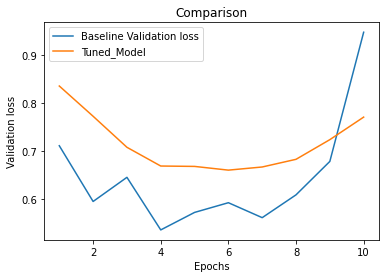

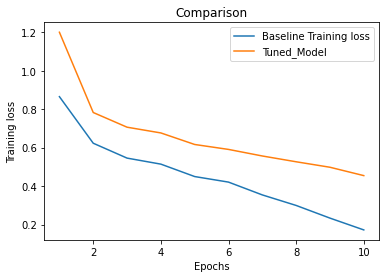

In [58]:
baseline_val_loss = history_baseline_model['val_loss']
tuned_model_val_loss = history_tuned_model['val_loss']
# tuned_1_model_val_loss = history_t_model_2['val_loss']
# tuned_2_model_val_loss = history_t_model_3['val_loss']


plot_history(data_list=[baseline_val_loss, tuned_model_val_loss],
             label_list=['Baseline Validation loss', 'Tuned_Model'],
             title='Comparison',
             ylabel='Validation loss')

baseline_loss = history_baseline_model['loss']
tuned_model_loss = history_tuned_model['loss']
# tuned_1_model_loss = history_t_model_2['loss']
# tuned_2_model_loss = history_t_model_3['loss']


plot_history(data_list=[baseline_loss, tuned_model_loss],
             label_list=['Baseline Training loss',  'Tuned_Model'],
             title='Comparison',
             ylabel='Training loss')

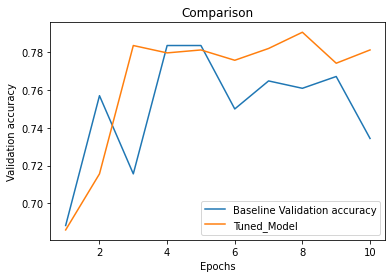

In [59]:
baseline_val_accuracy = history_baseline_model['val_accuracy']
tuned_model_val_accuracy = history_tuned_model['val_accuracy']


plot_history(data_list=[baseline_val_accuracy, tuned_model_val_accuracy],
             label_list=['Baseline Validation accuracy','Tuned_Model'],
             title='Comparison',
             ylabel='Validation accuracy')

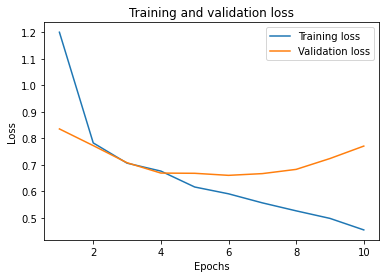

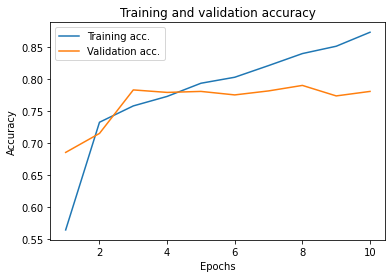

In [60]:
%matplotlib inline

acc = history_tuned_model['accuracy']
val_acc = history_tuned_model['val_accuracy']
loss = history_tuned_model['loss']
val_loss = history_tuned_model['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')

# Transfer Learning